In [1]:
!pip3 install -U ucimlrepo
from ucimlrepo import fetch_ucirepo
chronic_kidney_disease = fetch_ucirepo(id=336)

X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

print(chronic_kidney_disease.metadata)

print(chronic_kidney_disease.variables)

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [2]:
len(chronic_kidney_disease.data.targets)
len(chronic_kidney_disease.data.features)

400

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook
import random
import math
from sklearn.preprocessing import OneHotEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
!pip install torch torchvision torchaudio


   ---------------------------------------- 0.0/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.5/203.1 MB 764.3 kB/s eta 0:04:26
   ---------------------------------------- 0.5/203.1 MB 764.3 kB/s eta 0:04:26
   ---------------------------------------- 0.8/203.1 MB 781.4 kB/s eta 0:04:19
   ---------------------------------------- 1.0/203.1 MB 762.8 kB/s eta 0:04:25
   ---------------------------------------- 1.0/203.1 MB 762.8 kB/s eta 0:04:25
   ---------------------------------------- 1.3/203.1 MB 762.6 kB/s eta 0:04:25
   ---------------------------------------- 1.6/203.1 MB 784.4 kB/s eta 0:04:17
   ---------------------------------------- 1.6/203.1 MB 784.4 kB/s eta 0:04:17
   ---------------------------------------- 1.8/203.1 MB 774.4 kB/s eta 0:04

In [8]:
import torch
print(torch.__version__)

2.5.1+cpu


In [10]:
df = pd.concat([X,y], axis=1)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [11]:
## Data Preprocessing

In [12]:
df.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [13]:
numer_cols = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
df[numer_cols] = df[numer_cols].fillna(df[numer_cols].mean())

In [15]:
categor_cols = ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba']
df[categor_cols] = df[categor_cols].fillna(df[categor_cols].mode().iloc[0])

In [16]:
binary_cols = ['htn', 'dm', 'cad', 'appet', 'pe', 'ane']
df[binary_cols] = df[binary_cols].fillna(df[binary_cols].mode().iloc[0])

In [17]:
df.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [18]:
df[categor_cols] = df[categor_cols].astype('category')
df[categor_cols] = df[categor_cols].apply(lambda col: col.cat.codes)

df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,3,1,0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,3,4,0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1,2,3,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,0,4,0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1,2,0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [19]:
df[binary_cols] = df[binary_cols].astype('category')
df[binary_cols] = df[binary_cols].apply(lambda col: col.cat.codes)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,3,1,0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,2,0,0,0,0,ckd
1,7.0,50.0,3,4,0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,1,0,0,0,0,ckd
2,62.0,80.0,1,2,3,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,2,0,1,0,1,ckd
3,48.0,70.0,0,4,0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,1,0,1,1,1,ckd
4,51.0,80.0,1,2,0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,1,0,0,0,0,ckd


In [20]:
df["class"] = df["class"].map({"ckd": 1, "notckd": 0})
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,3,1,0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,2,0,0,0,0,1.0
1,7.0,50.0,3,4,0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,1,0,0,0,0,1.0
2,62.0,80.0,1,2,3,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,2,0,1,0,1,1.0
3,48.0,70.0,0,4,0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,1,0,1,1,1,1.0
4,51.0,80.0,1,2,0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,1,0,0,0,0,1.0


In [24]:
print(df["class"].unique())

[1. 0.]


In [25]:
X_train = df.drop('class', axis=1).values
y_train = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

In [26]:
X_train, y_train, X_test, y_test = map(torch.tensor, (X_train, y_train, X_test, y_test))

In [27]:
X_train.shape

torch.Size([280, 24])

In [28]:
y_train.shape

torch.Size([280])

In [29]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

C:\Users\Yasi\AppData\Local\Temp\ipykernel_29652\786676414.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
C:\Users\Yasi\AppData\Local\Temp\ipykernel_29652\786676414.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
C:\Users\Yasi\AppData\Local\Temp\ipykernel_29652\786676414.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.long)
C:\Users\Yasi\AppData\Local\Temp\ipy

In [30]:
class network(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
        super(network, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

  def forward(self, x):
      x = self.fc1(x)
      x = self.relu(x)
      x = self.fc2(x)
      return x

In [31]:
input_size = X_train_tensor.shape[1]
hidden_size = 16
output_size = 2
learning_rate = 0.01
num_epochs = 1000

In [32]:
model = network(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [33]:
losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/1000], Loss: 81.8385
Epoch [20/1000], Loss: 13.3443
Epoch [30/1000], Loss: 4.5742
Epoch [40/1000], Loss: 6.8633
Epoch [50/1000], Loss: 2.5262
Epoch [60/1000], Loss: 0.4837
Epoch [70/1000], Loss: 0.3996
Epoch [80/1000], Loss: 0.3845
Epoch [90/1000], Loss: 0.3523
Epoch [100/1000], Loss: 0.3212
Epoch [110/1000], Loss: 0.2979
Epoch [120/1000], Loss: 0.2829
Epoch [130/1000], Loss: 0.2702
Epoch [140/1000], Loss: 0.2603
Epoch [150/1000], Loss: 0.2508
Epoch [160/1000], Loss: 0.2419
Epoch [170/1000], Loss: 0.2335
Epoch [180/1000], Loss: 0.2257
Epoch [190/1000], Loss: 0.2183
Epoch [200/1000], Loss: 0.2115
Epoch [210/1000], Loss: 0.2050
Epoch [220/1000], Loss: 0.1990
Epoch [230/1000], Loss: 0.1934
Epoch [240/1000], Loss: 0.1881
Epoch [250/1000], Loss: 0.1831
Epoch [260/1000], Loss: 0.1785
Epoch [270/1000], Loss: 0.1741
Epoch [280/1000], Loss: 0.1699
Epoch [290/1000], Loss: 0.1660
Epoch [300/1000], Loss: 0.1623
Epoch [310/1000], Loss: 0.1943
Epoch [320/1000], Loss: 0.1767
Epoch [330/1000

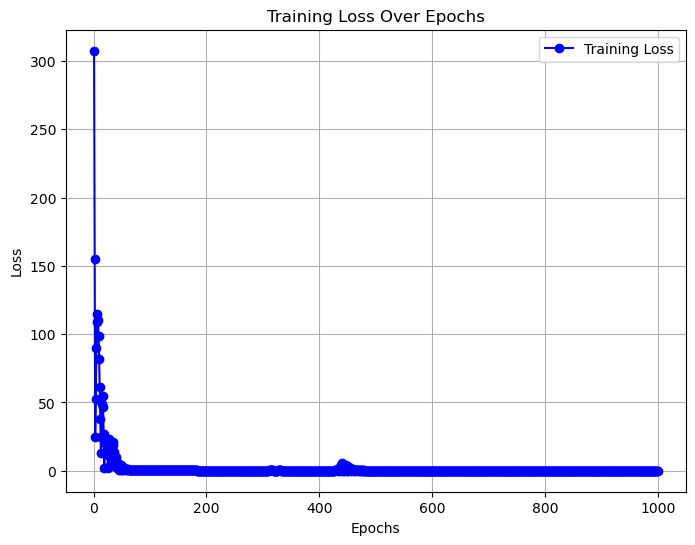

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), losses, label='Training Loss', color='blue', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.legend()
plt.show()


In [35]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_classes = torch.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes.numpy(), target_names=["notckd", "ckd"]))


Classification Report:
              precision    recall  f1-score   support

      notckd       1.00      0.98      0.99        44
         ckd       0.99      1.00      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



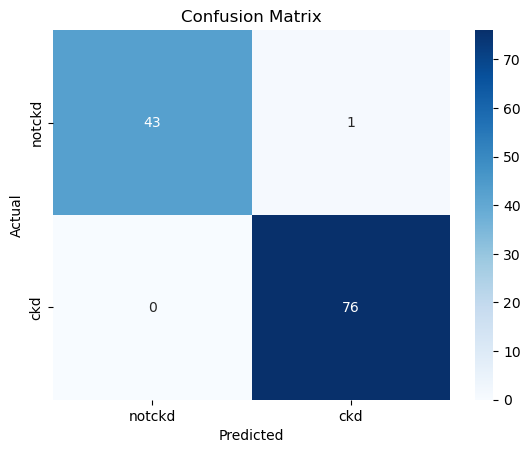

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred_classes.numpy())
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["notckd", "ckd"], yticklabels=["notckd", "ckd"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()